<a href="https://colab.research.google.com/github/dvaldez44/Reddit_Addiction/blob/main/TFIDF_W_K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# import other required libs
import pandas as pd
import numpy as np

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
df = pd.read_csv("Addiction_Reddit_030122.csv")

In [ ]:
df

,Unnamed: 0,title,score,id,url,comms_num,created,body,redditor,subreddit_addiction,subreddit_selfimprovement,Unnamed: 11
0,0,She Came Home Tonight,766,hwywkf,https://www.reddit.com/r/addiction/comments/hw...,149,7/24/2020 5:43,She’s Really Here\n\nMy 20 year old daughter i...,Babyyy_Kattt,1.0,0.0,0.0
1,1,Good afternoon everyone I’ve not touched cocai...,461,balejy,https://www.reddit.com/r/addiction/comments/ba...,41,4/7/2019 17:32,"Not expecting people to care much, but I am pr...",madre1932,1.0,0.0,0.0
2,2,Today officially marks 10 years clean from a 1...,442,fuoskf,https://www.reddit.com/r/addiction/comments/fu...,72,4/4/2020 2:31,I immediately started looking around for aceto...,0squatNcough0,1.0,0.0,0.0
3,3,Found 20$ and a bag of coke,383,mmcrl5,https://www.reddit.com/r/addiction/comments/mm...,49,4/7/2021 17:44,This is my second son who passed away from an ...,AderallAl,1.0,0.0,0.0
4,4,"My son, who was a longtime redditor, passed aw...",365,eg2qb3,https://www.reddit.com/r/addiction/comments/eg...,41,12/26/2019 18:22,Months ago I was stuck in the darkest place I ...,mrsbrown3333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9060,5911,Just got out Detox,OpiatesRecovery,39,sgn0cu,https://www.reddit.com/r/OpiatesRecovery/comme...,51,"I feel really weak, the food there sucks.. did...",NaN,NaN,NaN,NaN
9061,5912,"My story, my sobriety, my prison time, my come...",OpiatesRecovery,37,r5fl7h,https://www.reddit.com/r/OpiatesRecovery/comme...,24,"Hello Everyone,\n\n38/Single/White/West Coast/...",NaN,NaN,NaN,NaN
9062,5913,Day 14! 2 weeks baby!!!,OpiatesRecovery,39,qt1q9d,https://www.reddit.com/r/OpiatesRecovery/comme...,9,Here's the most exciting thing that's happened...,NaN,NaN,NaN,NaN
9063,5914,"1 year, I'm no-one special but It's possible.",OpiatesRecovery,40,q3kvbo,https://www.reddit.com/r/OpiatesRecovery/comme...,19,"Today, Oct 7th I hit one year sober from opiat...",NaN,NaN,NaN,NaN


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['cleaned'] = df['body'].apply(lambda x: preprocess_text(x, remove_stopwords=True))


In [ ]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

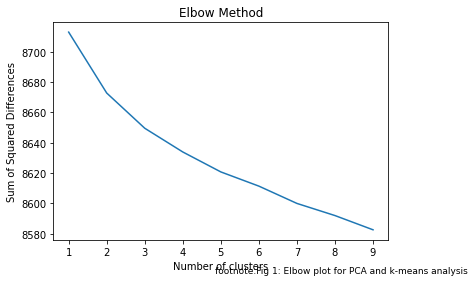

In [ ]:
Sum_of_squared_distances = [] #elbow method for optimal clusters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(range(1, 10), Sum_of_squared_distances)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Differences')
plt.figtext(0.5, 0.01, "footnote:Fig 1: Elbow plot for PCA and k-means analysis", ha="left", fontsize=9)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(50)


Cluster 0
without,two,started,feeling,every,better,shit,adderall,addiction,take,good,use,weeks,meth,getting,much,quit,since,taking,even,want,would,never,go,week,ago,one,first,really,going,using,year,still,life,back,know,got,mg,last,months,sober,today,feel,like,time,years,get,clean,day,days

Cluster 1
please,got,back,advice,also,trying,take,anything,thank,guys,feeling,never,still,always,way,stop,years,keep,something,even,addiction,make,self,work,someone,everyone,go,today,things,need,love,think,anyone,going,better,would,much,really,good,day,one,help,want,time,people,know,life,feel,get,like

Cluster 2
right,anything,everything,hard,someone,see,started,take,year,first,self,help,love,need,also,lot,every,got,person,still,could,always,something,friends,work,way,back,good,go,make,think,years,day,better,going,never,much,would,one,really,even,things,people,get,want,know,feel,time,life,like


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "Personal Addiction Struggle", 1: "Asking for Advice", 2: "Giving Advice"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

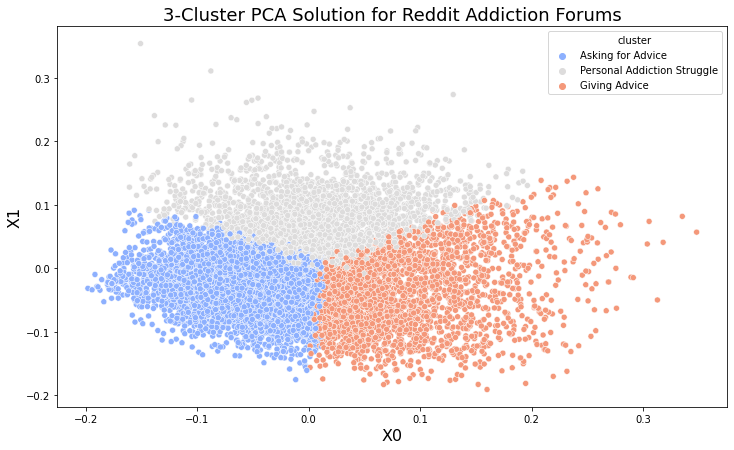

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("3-Cluster PCA Solution for Reddit Addiction Forums", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="coolwarm")
plt.show()

In [ ]:
cluster_map = {0: "Personal Addiction Struggle", 1: "Asking for Advice", 2: "Giving Advice"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = df[['body', 'cleaned', 'cluster']]

In [ ]:
df

,body,cleaned,cluster
0,She’s Really Here\n\nMy 20 year old daughter i...,really year old daughter heroin addict chosen ...,1
1,"Not expecting people to care much, but I am pr...",expecting people care much proud least edit th...,1
2,I immediately started looking around for aceto...,immediately started looking around acetone cle...,0
3,This is my second son who passed away from an ...,second son passed away od youngest passed od s...,0
4,Months ago I was stuck in the darkest place I ...,months ago stuck darkest place ever dope every...,0
...,...,...,...
9060,"I feel really weak, the food there sucks.. did...",feel really weak food sucks nt sleep much get ...,0
9061,"Hello Everyone,\n\n38/Single/White/West Coast/...",hello everyone single white west coast male ma...,2
9062,Here's the most exciting thing that's happened...,exciting thing happened today normal poop help...,1
9063,"Today, Oct 7th I hit one year sober from opiat...",today oct th hit one year sober opiates much s...,0


In [ ]:
df.cluster.value_counts()

Asking for Advice              3885
Giving Advice                  2661
Personal Addiction Struggle    2519
Name: cluster, dtype: int64

In [ ]:
countvec = CountVectorizer(ngram_range=(1,4), 
                           stop_words='english',  
                           strip_accents='unicode', 
                           max_features=1000)

In [ ]:
bow = countvec.fit_transform(df.cleaned)


In [ ]:
mnb = MultinomialNB()
cv_scores = cross_val_score(mnb,X=bow.toarray(), 
                            y=df.cluster.values, cv=20)

In [ ]:
mean_cv = cv_scores.mean()


In [ ]:
print('CV scores: {}'.format(cv_scores))
print('Mean Cross validated accuracy: {}'.format(round(mean_cv, 2)))

CV scores: [0.63436123 0.67400881 0.68281938 0.66299559 0.73788546 0.65783664
 0.70640177 0.70419426 0.70198675 0.66887417 0.74613687 0.75275938
 0.77483444 0.76821192 0.73951435 0.64238411 0.59381898 0.5584989
 0.55187638 0.61368653]
Mean Cross validated accuracy: 0.68


In [ ]:
pca = PCA(n_components=200)
X_train_reduced = pca.fit_transform(X_train.toarray())

In [ ]:
X_test_reduced = pca.transform(X_test.toarray())


In [ ]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train_reduced, y_train)
y_pred = lr.predict(X_test_reduced)
score = accuracy_score(y_test, y_pred)
print("Accuracy score: {}%".format(round(score*100)))

Accuracy score: 87%


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 9.2 MB/s 


In [ ]:
import nltk
import os
import pandas as pd
import numpy as np
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
df

,body,cleaned,cluster
0,She’s Really Here\n\nMy 20 year old daughter i...,really year old daughter heroin addict chosen ...,1
1,"Not expecting people to care much, but I am pr...",expecting people care much proud least edit th...,1
2,I immediately started looking around for aceto...,immediately started looking around acetone cle...,0
3,This is my second son who passed away from an ...,second son passed away od youngest passed od s...,0
4,Months ago I was stuck in the darkest place I ...,months ago stuck darkest place ever dope every...,0
...,...,...,...
9060,"I feel really weak, the food there sucks.. did...",feel really weak food sucks nt sleep much get ...,0
9061,"Hello Everyone,\n\n38/Single/White/West Coast/...",hello everyone single white west coast male ma...,2
9062,Here's the most exciting thing that's happened...,exciting thing happened today normal poop help...,1
9063,"Today, Oct 7th I hit one year sober from opiat...",today oct th hit one year sober opiates much s...,0


In [ ]:
sid.polarity_scores(df.iloc[23]['body'])

{'neg': 0.119, 'neu': 0.734, 'pos': 0.147, 'compound': 0.4482}

In [ ]:
df['scores'] = df['body'].apply(lambda review:sid.polarity_scores(review))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,body,cleaned,cluster,scores,compound
0,She’s Really Here\n\nMy 20 year old daughter i...,really year old daughter heroin addict chosen ...,1,"{'neg': 0.115, 'neu': 0.745, 'pos': 0.14, 'com...",0.8055
1,"Not expecting people to care much, but I am pr...",expecting people care much proud least edit th...,1,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.9758
2,I immediately started looking around for aceto...,immediately started looking around acetone cle...,0,"{'neg': 0.034, 'neu': 0.842, 'pos': 0.123, 'co...",0.8629
3,This is my second son who passed away from an ...,second son passed away od youngest passed od s...,0,"{'neg': 0.099, 'neu': 0.811, 'pos': 0.09, 'com...",-0.3506
4,Months ago I was stuck in the darkest place I ...,months ago stuck darkest place ever dope every...,0,"{'neg': 0.173, 'neu': 0.717, 'pos': 0.109, 'co...",-0.8581
...,...,...,...,...,...
9060,"I feel really weak, the food there sucks.. did...",feel really weak food sucks nt sleep much get ...,0,"{'neg': 0.18, 'neu': 0.78, 'pos': 0.04, 'compo...",-0.8427
9061,"Hello Everyone,\n\n38/Single/White/West Coast/...",hello everyone single white west coast male ma...,2,"{'neg': 0.139, 'neu': 0.742, 'pos': 0.118, 'co...",-0.9975
9062,Here's the most exciting thing that's happened...,exciting thing happened today normal poop help...,1,"{'neg': 0.015, 'neu': 0.69, 'pos': 0.295, 'com...",0.9864
9063,"Today, Oct 7th I hit one year sober from opiat...",today oct th hit one year sober opiates much s...,0,"{'neg': 0.054, 'neu': 0.767, 'pos': 0.178, 'co...",0.7575


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv("addiction_reddit_rnr_analyzed.csv")